In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import tensorflow as tf
import tensorflow_text as text   # 🔴 REQUIRED
import tensorflow_hub as hub

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv
/kaggle/input/bert/tensorflow2/bert-en-uncased-l-12-h-768-a-12/2/saved_model.pb
/kaggle/input/bert/tensorflow2/bert-en-uncased-l-12-h-768-a-12/2/keras_metadata.pb
/kaggle/input/bert/tensorflow2/bert-en-uncased-l-12-h-768-a-12/2/assets/vocab.txt
/kaggle/input/bert/tensorflow2/bert-en-uncased-l-12-h-768-a-12/2/variables/variables.index
/kaggle/input/bert/tensorflow2/bert-en-uncased-l-12-h-768-a-12/2/variables/variables.data-00000-of-00001
/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/saved_model.pb
/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/keras_metadata.pb
/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/assets/vocab.txt
/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/variables/variables.index
/kaggle/input/bert/tensorflow2/en-uncased-preprocess/3/variables/variables.data-00000-of-00001


In [20]:
preprocessor = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3",
    name="preprocessing"
)

bert_model = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4",
    trainable=True,
    name="bert_encoder"
)


In [21]:
train_text = ["Nice text", "What the hell?"]
preprocessed = preprocessor(train_text)
preprocessed.keys()

dict_keys(['input_type_ids', 'input_mask', 'input_word_ids'])

In [22]:
# preprocessed['input_word_ids']
# preprocessed['input_type_ids']
preprocessed['input_mask']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

In [23]:
train_text = ["Nice text", "What the hell?"]
bert_modeled = bert_model(preprocessed)
bert_modeled.keys()

dict_keys(['pooled_output', 'sequence_output', 'encoder_outputs', 'default'])

In [24]:
bert_modeled['sequence_output']
# bert_modeled['encoder_outputs']
# bert_modeled['pooled_output']

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[-0.02106337,  0.02609121, -0.03264663, ..., -0.3114823 ,
         -0.04021896,  0.10997047],
        [ 0.30600503, -0.6154858 ,  0.39600122, ..., -0.4699347 ,
          0.10029607, -0.19988385],
        [ 0.05030202, -0.18763977, -0.18540645, ..., -0.36588323,
         -0.21999162, -0.46386486],
        ...,
        [-0.07555667, -0.08931731,  0.4017831 , ..., -0.24176408,
         -0.26623994,  0.24111962],
        [-0.37899885, -0.5204524 , -0.09270418, ...,  0.10464523,
         -0.37960097, -0.20660026],
        [-0.06974189, -0.1634897 ,  0.3845876 , ..., -0.16713479,
         -0.21019611,  0.04028726]],

       [[-0.12534145,  0.35392645, -0.23368007, ..., -0.34910834,
          0.42002225,  0.30854398],
        [-0.10873766,  0.5655014 , -0.4760757 , ...,  0.04378016,
          0.7850149 , -0.2939581 ],
        [-0.2619882 , -0.24254909, -0.32545373, ..., -0.29173145,
          0.971722  , -0.5210451 ],
        ...,

In [25]:
df = pd.read_csv('/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv')

In [26]:
df['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

In [27]:
df_ham = df[df['label']=='ham']
df_spam = df[df['label']=='spam']

In [28]:
df_ham_under = df_ham.sample(df_spam.shape[0])
df_ham_under.shape

(1499, 4)

In [29]:
df_balanced = pd.concat([df_ham_under,df_spam])
df_balanced.shape

(2998, 4)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced['text'], df_balanced['label_num'], test_size=0.33, stratify=df_balanced['label_num'])


In [31]:
input_text = tf.keras.layers.Input(shape=(),dtype=tf.string,name='text')
preprocessed_text = preprocessor(input_text)
outputs = bert_model(preprocessed_text)

n = tf.keras.layers.Dropout(0.1,name='dropout')(outputs['pooled_output'])
n = tf.keras.layers.Dense(1,activation='sigmoid', name='output')(n)


model = tf.keras.Model(inputs = [input_text],outputs=[n])

METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5),loss='binary_crossentropy',metrics=METRICS)
model.fit(X_train,y_train)

63/63 [==============================] - 107s 996ms/step - loss: 0.2349 - accuracy: 0.9019 - precision: 0.9113 - recall: 0.8904


In [32]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
y_pred = np.where(y_pred >0.5, 1,0)
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

31/31 [==============================] - 11s 347ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       490
           1       0.98      0.97      0.97       500

    accuracy                           0.97       990
   macro avg       0.97      0.97      0.97       990
weighted avg       0.97      0.97      0.97       990



<Axes: >

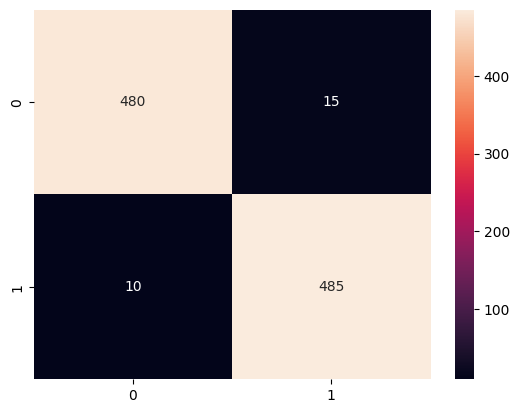

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')

In [34]:
model.evaluate(X_test,y_test)

31/31 [==============================] - 12s 353ms/step - loss: 0.0788 - accuracy: 0.9747 - precision: 0.9700 - recall: 0.9798


[0.07876379042863846,
 0.9747474789619446,
 0.9700000286102295,
 0.9797979593276978]

In [36]:
model.predict(['''Hello Shivam,

Final Call Alert! Participate in the Nation Building Case Study Competition

Offer:

Gain PPO & internship opportunities
Cash prize pool worth INR 10 Lakhs
Win MacBooks and iPads
Eligibility: Open to all undergraduate students across all domains'''])

1/1 [==============================] - 0s 41ms/step


array([[0.98126924]], dtype=float32)